# Bank Product Prediction by Ifeoma Augusta Adigwe
- The dataset contains 4521 records of Direct Bank Marketing Campaigns of a Portuguese banking Institution.
- The dataset is public available for research. The details are described in Moro et al., 2011

In [1]:
import pandas as pd
import numpy as np

# Import visual python libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a pandas dataframe

data = pd.read_excel(r'C:\Users\iphy2\Downloads\Python Files2\Python_project_bank2.xlsx')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
# Rename some of the column names

data = data.rename(columns={"poutcome": "outcome"})
data = data.rename(columns={"y": "bank_product"})

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,bank_product
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:

data['bank_product'].unique()
corrections = {
    'yes' : 1,
    'no' : 0
}
data['bank_product'] = data['bank_product'].replace(corrections)

In [6]:

data['loan'].unique()
corrections = {
    'yes' : 1,
    'no' : 0
}
data['loan'] = data['loan'].replace(corrections)

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,bank_product
0,30,unemployed,married,primary,no,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,0,cellular,6,feb,129,4,211,3,other,0


In [8]:
## Statistical descrtiptive analysis of the numerical data

data.describe().astype('int')

,age,balance,loan,day,duration,campaign,pdays,previous,bank_product
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
mean,41,1422,0,15,263,2,39,0,0
std,10,3009,0,8,259,3,100,1,0
min,19,-3313,0,1,4,1,-1,0,0
25%,33,69,0,9,104,1,-1,0,0
50%,39,444,0,16,185,2,-1,0,0
75%,49,1480,0,21,329,3,-1,0,0
max,87,71188,1,31,3025,50,871,25,1


In [9]:
## Check the shape of the data

data.shape

(4521, 17)

In [10]:
## Check the missing values

data.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
outcome         0
bank_product    0
dtype: int64

<AxesSubplot:title={'center':'Visualizing missing values'}>

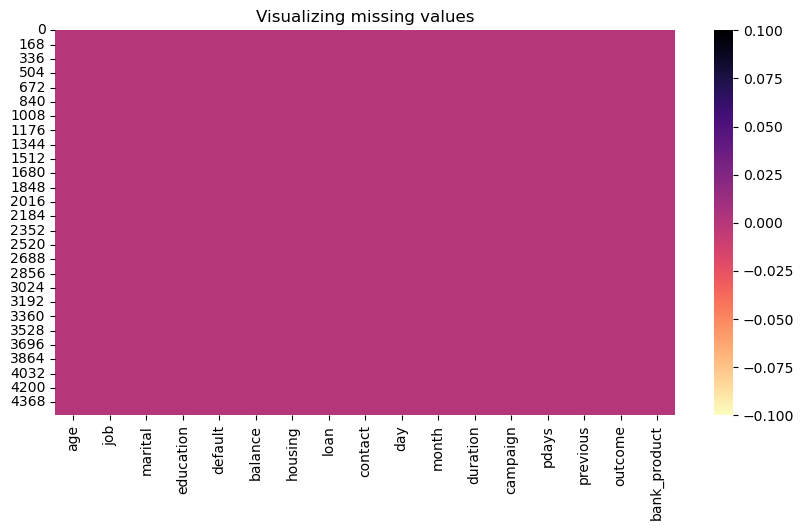

In [11]:
## Visualise missing value

plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values')
sns.heatmap(data.isnull(), cbar = True, cmap = 'magma_r')

In [12]:
# To know the number of Died and survived passenger

data['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

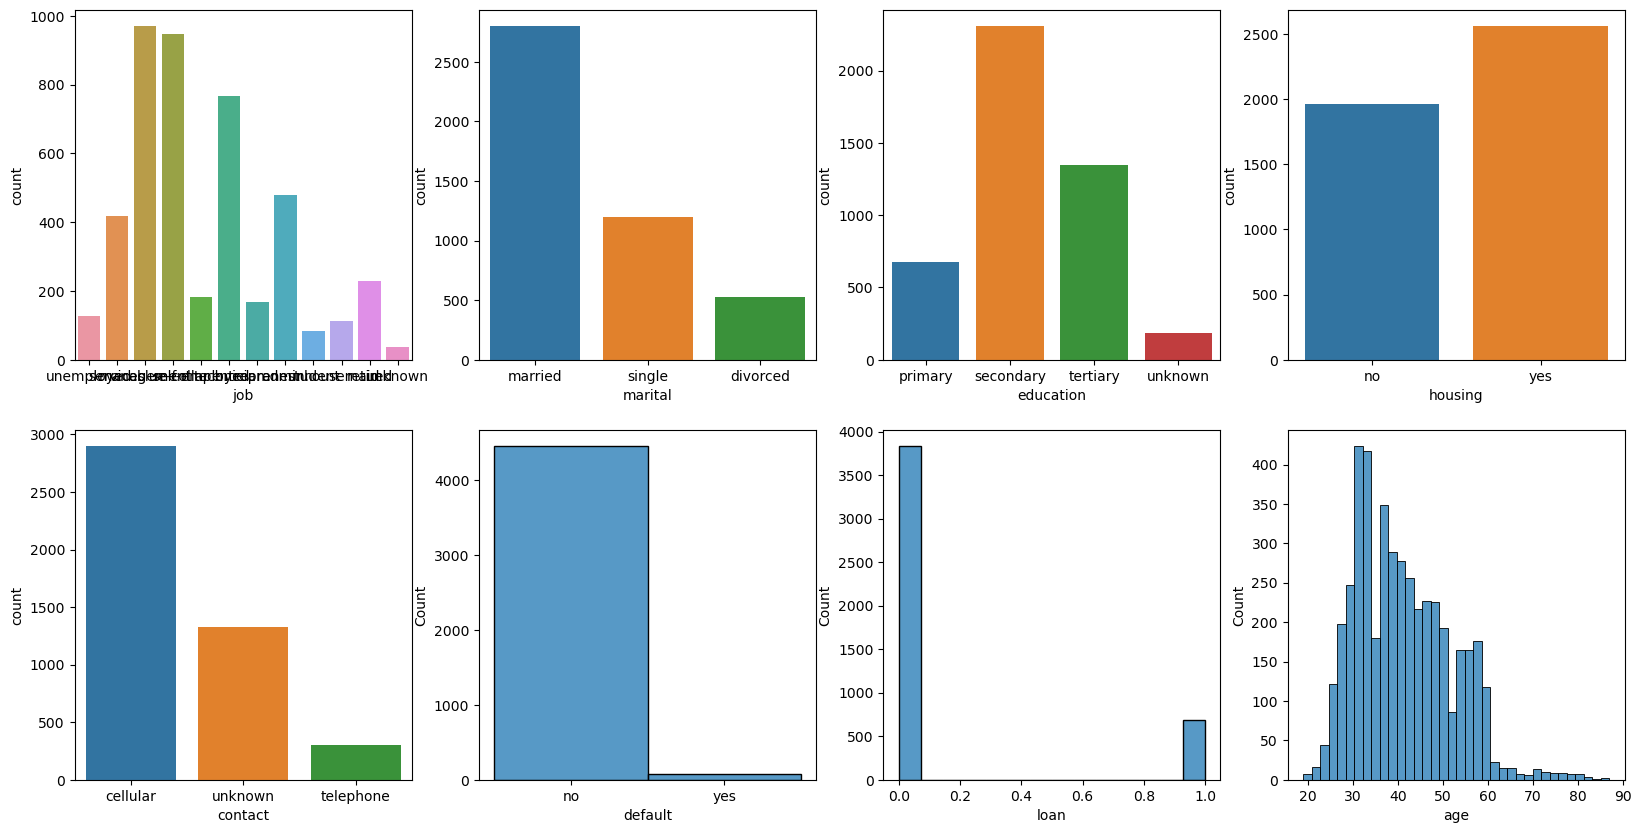

In [13]:

fig, axes = plt.subplots(2, 4, figsize = (20, 10))
sns.countplot(x = 'job', data = data, ax = axes[0, 0])
sns.countplot(x = 'marital', data = data, ax = axes[0, 1])
sns.countplot(x = 'education', data = data, ax = axes[0, 2])
sns.countplot(x = 'housing', data = data, ax = axes[0, 3])
sns.countplot(x = 'contact', data = data, ax = axes[1, 0])
sns.histplot(x = 'default', data = data, ax = axes[1, 1])

# Numerical Data - Histogram
sns.histplot(x = 'loan', data = data, ax = axes[1, 2])
sns.histplot(x = 'age', data = data, ax = axes[1, 3])



In [14]:
## marital staus by loan.

marital_success = data['loan'].groupby(data.marital).sum()
marital_success

marital
divorced     90
married     453
single      148
Name: loan, dtype: int64

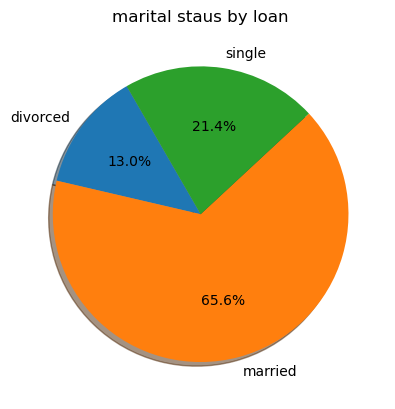

In [15]:
marital_success = data['loan'].groupby(data.marital).sum().head(3)
marital_success

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(marital_success, labels = marital_success.index, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.title('marital staus by loan')
plt.show()

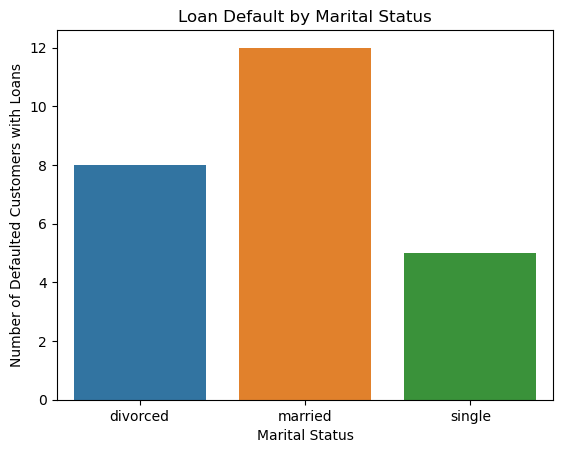

In [16]:
# Loan default by martial status


# filter the data to only include customers with loans and who defaulted
data_with_loan_and_default = data[(data['loan'] == 1) & (data['default'] == 'yes')]

# group the data by marital status and count the number of customers
data_grouped = data_with_loan_and_default.groupby('marital')['marital'].count()

# create a bar chart of the loan default by marital status
sns.barplot(x=data_grouped.index, y=data_grouped.values)

# set the axis label and title
plt.xlabel('Marital Status')
plt.ylabel('Number of Defaulted Customers with Loans')
plt.title('Loan Default by Marital Status')

# show the plot
plt.show()

Observation
- It is observed that married customers have the highest default rate

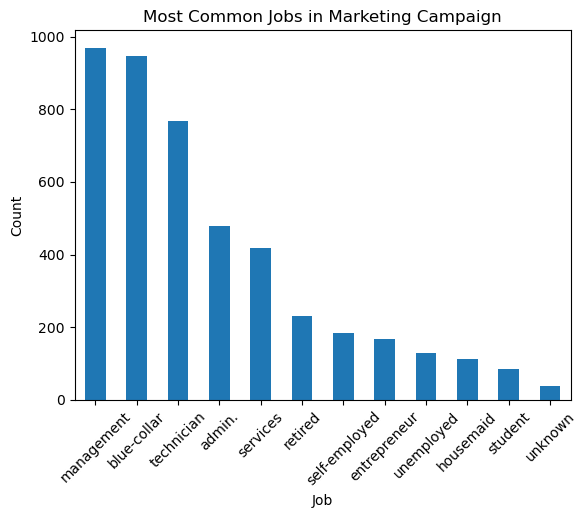

In [17]:
# What are the most common jobs among the customers targeted in the marketing campaign?

# Select the 'job' column and count the number of occurrences of each job
job_counts = data['job'].value_counts()

# Plot the results as a bar chart
job_counts.plot(kind='bar', rot=45)

# Set the chart title and axis labels
plt.title('Most Common Jobs in Marketing Campaign')
plt.xlabel('Job')
plt.ylabel('Count')

# Show the plot
plt.show()


Based on the bar chart, we can see that the most common jobs among customers targeted in the marketing campaign 
are management, blue-collar, and technician.

In [18]:
housing_by_marital = data.groupby('marital')['housing'].value_counts().unstack()


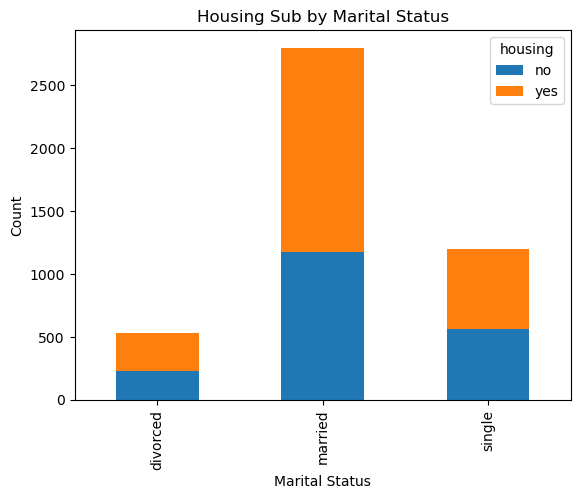

In [19]:

housing_by_marital.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Housing Sub by Marital Status')
plt.show()


Observation

It is observed that more married customers have subscribed to Housing

In [20]:
## marital staus by bal.

marital_success = data['balance'].groupby(data.marital).sum().head(3)
marital_success

marital
divorced     592622
married     4092558
single      1746656
Name: balance, dtype: int64

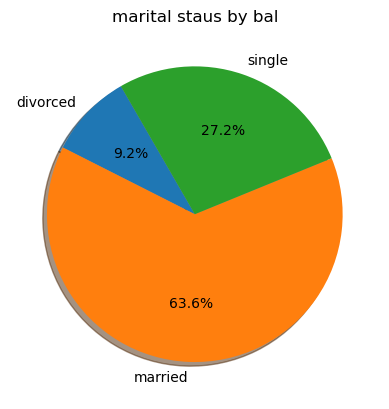

In [21]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(marital_success, labels = marital_success.index, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.title('marital staus by bal')
plt.show()

Observation
The pie chart shows that among the different marital status categories, married customers have the highest total balance held in the bank. 
Therefore, it appears that marital status may be a relevant factor to consider when analyzing the balance held by customers in the bank."

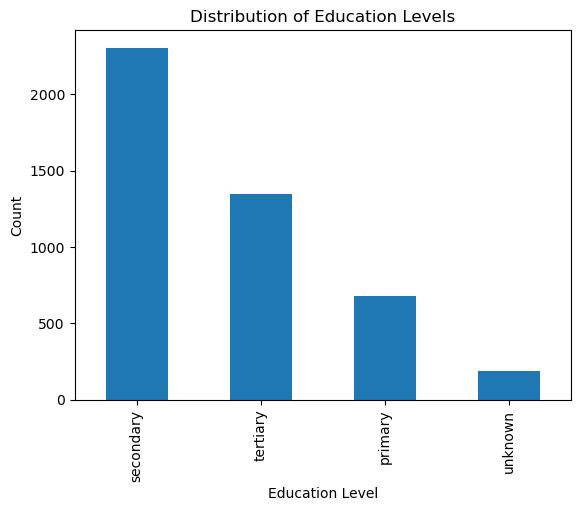

In [22]:
# What is the distribution of education levels among the customers targeted in the marketing campaign?":

education_counts = data['education'].value_counts()

# Plot the results as a bar chart
education_counts.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()


Observation

Based on the bar chart, we can see that the most common education levels among customers targeted in the marketing campaign are 
secondary education and tertiary education.

In [23]:
# Calculate the proportion of customers who have defaulted on loans
default_prop = data['default'].value_counts(normalize=True)

# Print the results
print(f"Proportion of customers who have defaulted on loans:\n{default_prop}\n")

Proportion of customers who have defaulted on loans:
no     0.98319
yes    0.01681
Name: default, dtype: float64



<AxesSubplot:>

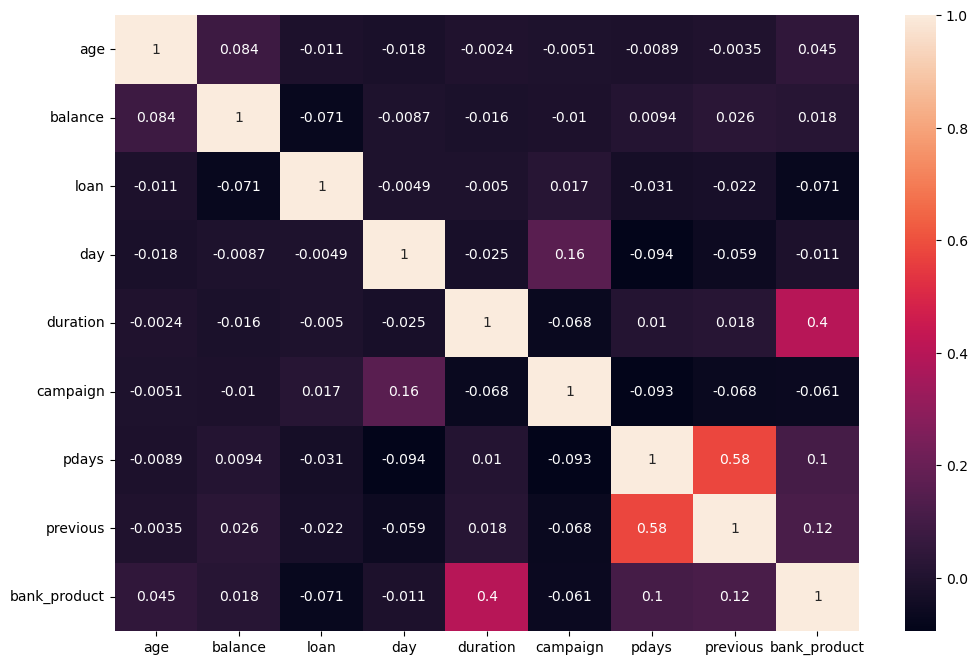

In [24]:
plt.figure(figsize = (12, 8))
corel = data.corr()
sns.heatmap(corel, annot = True)

Proportion of customers who have taken out loans:
0    0.847158
1    0.152842
Name: loan, dtype: float64



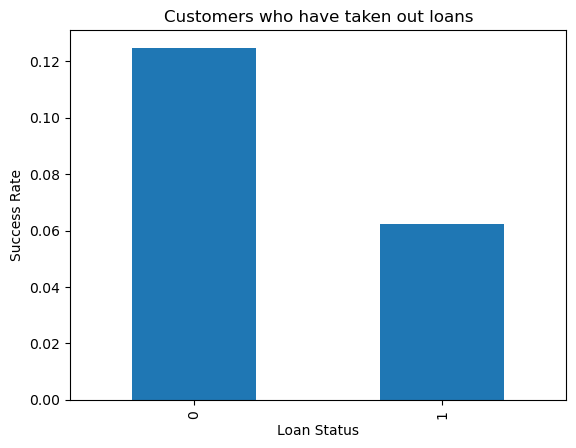

In [25]:
# What is the proportion of customers who have taken out loans (loan)

# Calculate the proportion of customers who have taken out loans
loan_prop = data['loan'].value_counts(normalize=True)

# Print the results
print(f"Proportion of customers who have taken out loans:\n{loan_prop}\n")

# Calculate the success rate of the marketing campaign for customers who have and have not taken out loans
customer_loan = data.groupby('loan')['bank_product'].mean()

# Plot the results as a bar chart
customer_loan.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Customers who have taken out loans')
plt.xlabel('Loan Status')
plt.ylabel('Success Rate')

# Show the plot
plt.show()


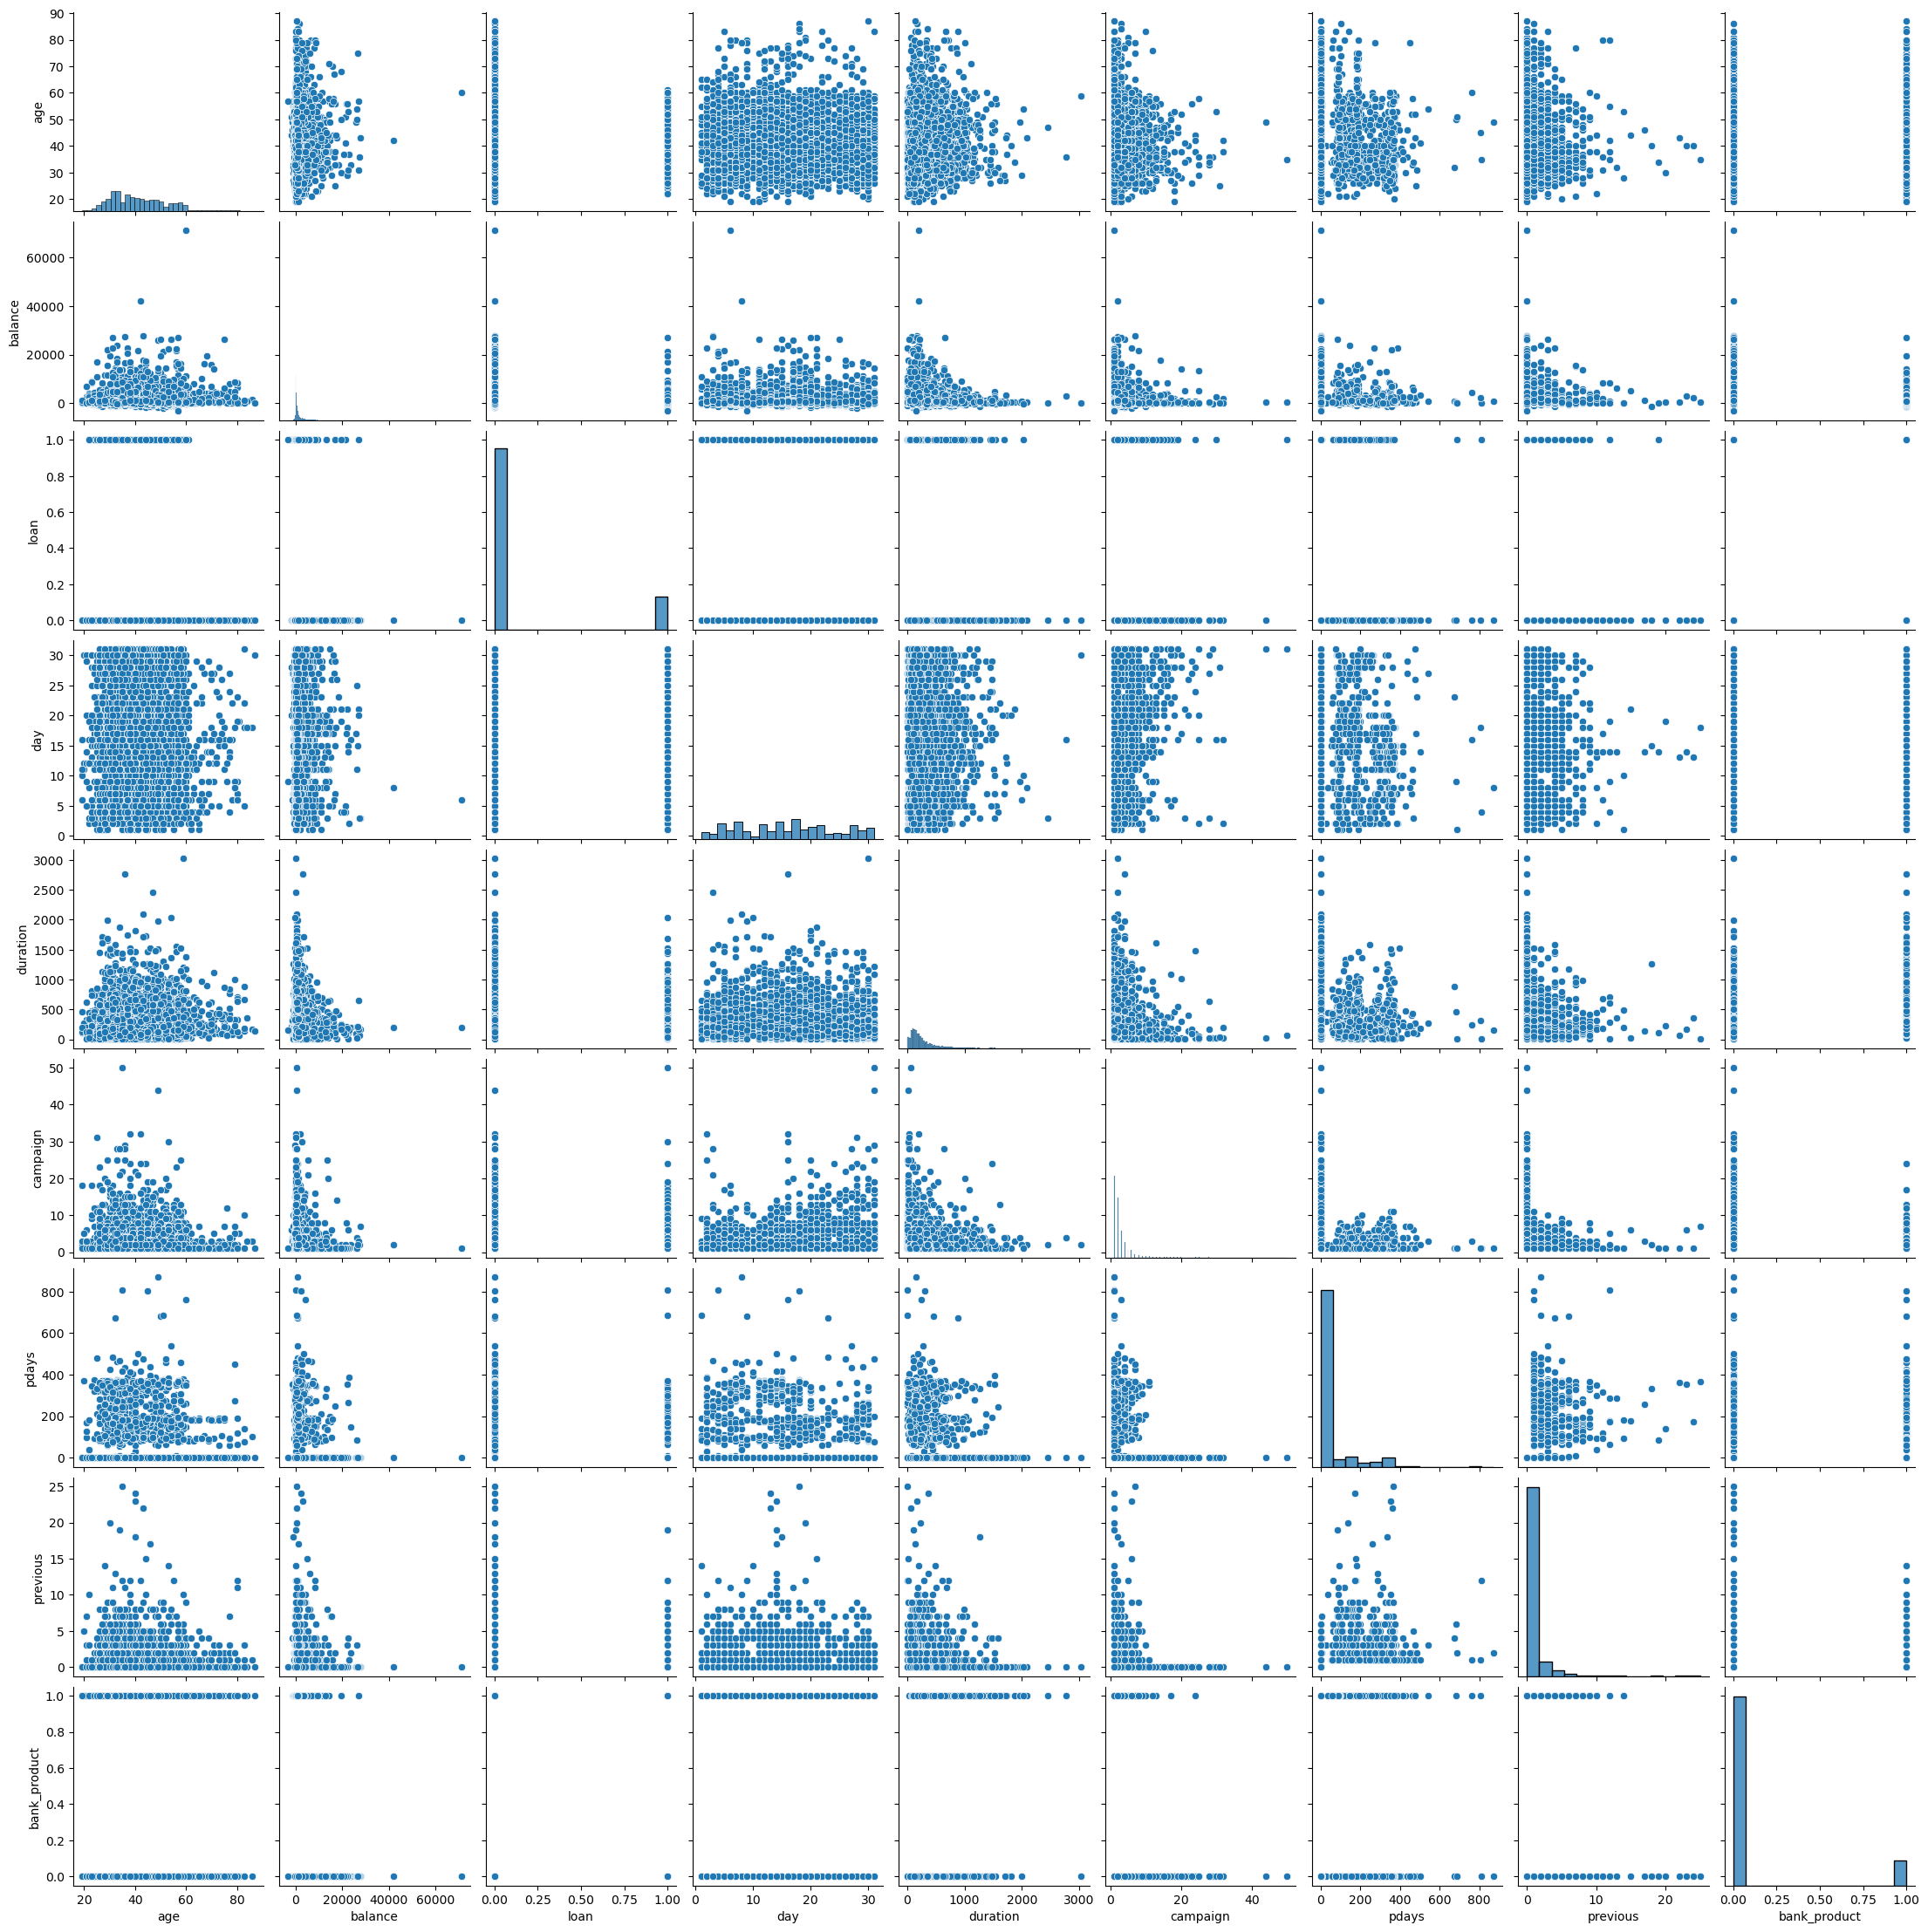

In [26]:
## Plot a sns.pairplot to view relationship between features on my dataset

import seaborn as sns
import pandas as pd

# Plot the pairplot
sns.pairplot(data)

# Show the plot
plt.show()


c:\Users\iphy2\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


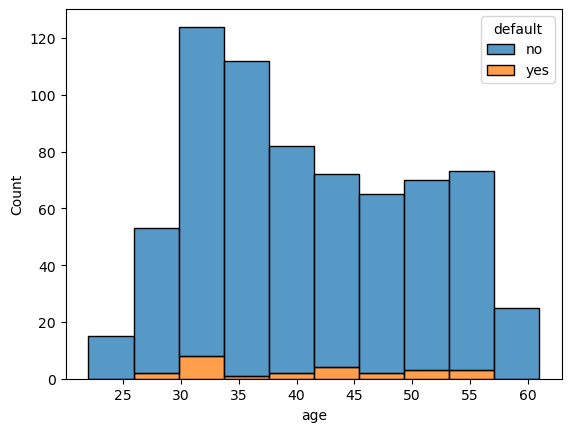

In [27]:

# Filter the data for customers with loans and group by age and default
data_loans = data[data['loan'] == 1].groupby(['age', 'default'], as_index=False).size()

# Rename the size column to count
data_loans = data_loans.rename(columns={'size': 'count'})

# Plot the histogram
sns.histplot(data=data_loans, x='age', hue='default', weights='count', multiple='stack')

# Show the plot
plt.show()


Observation

The proportion of customers with loans is generally higher among middle-aged customers, with the highest proportion being 
among customers in their 30s.The proportion of customers who have defaulted on loans is still among this age group

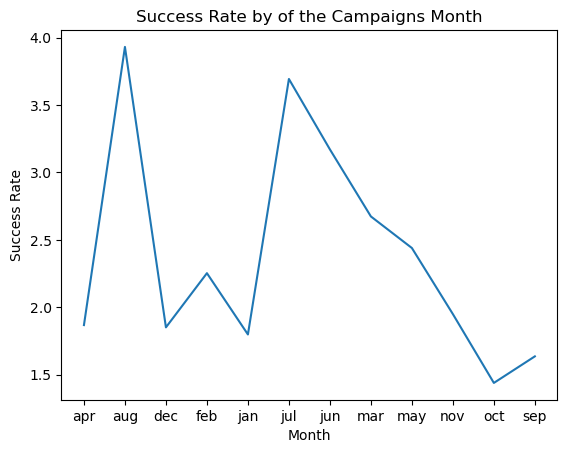

In [28]:

# create a pivot table to get the count of responses by month
pivot_table = pd.pivot_table(data, values='campaign', index=['month'], aggfunc=['count', 'sum'])
pivot_table.columns = ['count', 'success_count']

# calculate success rate and reset the index
pivot_table['success_rate'] = pivot_table['success_count'] / pivot_table['count']
pivot_table = pivot_table.reset_index()

# create a lineplot to visualize the success rate by month
sns.lineplot(x="month", y="success_rate", data=pivot_table)

# set the plot title and axis labels
plt.title("Success Rate by of the Campaigns Month")
plt.xlabel("Month")
plt.ylabel("Success Rate")

# show the plot
plt.show()


Observation:

- it is observed that the success rate of the campaign tends to be higher during certain months of the year -eg- summer (August) and 
lower during others months .

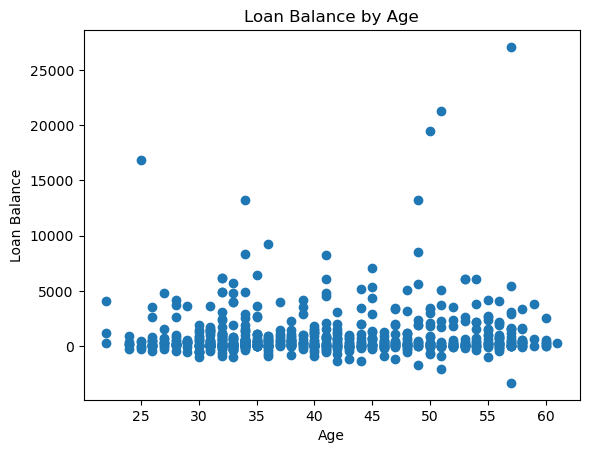

In [29]:
# Scattered graph for the customers who have taken out loans, grouped by age

import pandas as pd
import matplotlib.pyplot as plt


# filter the data to only include customers with loans
data_with_loan = data[data['loan'] == 1]

# create a scatter plot of age vs. loan balance
plt.scatter(data_with_loan['age'], data_with_loan['balance'])

# set the axis labels and title
plt.xlabel('Age')
plt.ylabel('Loan Balance')
plt.title('Loan Balance by Age')

# show the plot
plt.show()


Observation

- Is there a clear relationship between age and loan balance for customers who have taken out loans?
- It is observed that customers with the highest loan balance is in their 50s


In [30]:
# Count of products

product_counts = data[data['campaign'] == 1]['outcome'].value_counts()
print(product_counts)


unknown    1309
failure     263
other        88
success      74
Name: outcome, dtype: int64


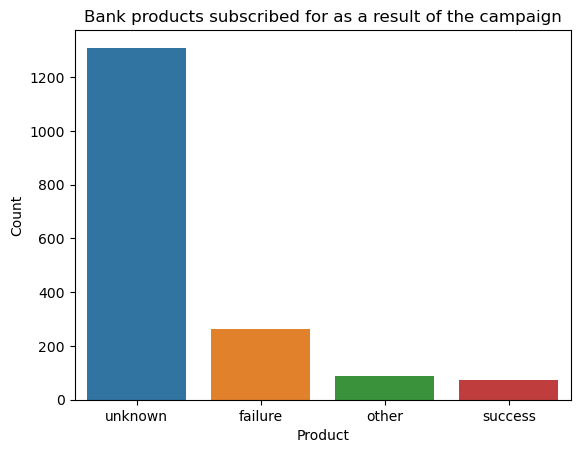

In [31]:
# As a result of the campaign how many bank products were subscribed for

sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Bank products subscribed for as a result of the campaign')
plt.show()


# Bank Product Prediction
- The dataset provided will be used to predict whether a bank customer will subscribe for a product or not.

Using One-Hot Encoding to Convert the Categoriacal Variables

In [32]:
import pandas as pd
import numpy as np

# Import visual python libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load the dataset into a pandas dataframe

data = pd.read_excel(r'C:\Users\iphy2\Downloads\Python Files2\Python_project_bank2.xlsx')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [34]:
# Rename some of the column names

data = data.rename(columns={"poutcome": "outcome"})
data = data.rename(columns={"y": "bank_product"})

In [35]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,bank_product
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


 Use conditional statement on our target column

In [36]:
bank_product = {'no': 0, 'yes': 1}
data['bank_product'] = data['bank_product'].map(bank_product).fillna(data['bank_product'])

In [37]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,bank_product
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


After successful convertion of our column to float, we will select the rest of the columns with categorical vearialbles.

In [38]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'outcome']
categories_dummies = pd.get_dummies(data[categorical])
categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [39]:
data[categorical]

,job,marital,education,default,housing,loan,contact,month,outcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown
4518,technician,married,secondary,no,no,no,cellular,aug,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other


Joining the encoded varialble to dataframe

In [40]:
data = pd.concat([data, categories_dummies], axis = 1)

print(data.shape)
data.head()

(4521, 61)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,0,0,0,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,1,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


Dropping categorical columns and replacing with converted ones

In [41]:
data = data.drop(categorical, axis = 1)
data.head()

,age,balance,day,duration,campaign,pdays,previous,bank_product,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [42]:
data.tail()

,age,balance,day,duration,campaign,pdays,previous,bank_product,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,outcome_failure,outcome_other,outcome_success,outcome_unknown
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4520,44,1136,3,345,2,249,7,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
#Define your target variable

y = data['bank_product']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: bank_product, dtype: int64

In [44]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'bank_product', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'outcome_failure', 'outcome_other', 'outcome_success',
       'outcome_unknown'],
      dtype='object')

In [45]:
y = data.bank_product
X = data.drop('bank_product', axis = 1)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


# Prepare my Model

In [46]:

# Create a train and test dataset

from sklearn.model_selection import train_test_split

In [47]:
# Split the dataset with test size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3, random_state = 10, stratify = y)

In [48]:
print('\n', X_train.head())
print('\n', X_test.head())
print('\n', y_train.head())
print('\n', y_test.head())


       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
2112   46       22    7       414         4     -1         0           1   
3168   59     2381   30       173         2     -1         0           1   
1717   35       62   30        67         1     -1         0           1   
227    33      359   20       210         1    242         1           0   
1248   33       90   28       263         2     -1         0           0   

      job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
2112                0                 0  ...          0          0          0   
3168                0                 0  ...          0          0          0   
1717                0                 0  ...          0          0          0   
227                 0                 0  ...          0          0          0   
1248                0                 0  ...          0          0          0   

      month_nov  month_oct  month_sep  outcome_failure

# Train my Model

1. Decision Tree Classifier

In [49]:
# Decision Tree Classifier algorithm

from sklearn.tree import DecisionTreeClassifier

In [50]:
DC_model = DecisionTreeClassifier()

In [51]:
# Fit the model

DC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# Create the prediction

DC_preds = DC_model.predict(X_test)

In [53]:
# Import accuracy score

from sklearn.metrics import accuracy_score

In [54]:
# Print accurancy score

print(accuracy_score(DC_preds, y_test))

0.840825350036846


 Observation
- the accuracy score for Decision Tree Classifer is approximately 84.37%

2. Random Forest Classifier

In [55]:
# import the random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [56]:
# Cretae model

RF_model = RandomForestClassifier()

In [57]:
# Fit the model

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
# Create the prediction

RF_preds = RF_model.predict(X_test)

In [59]:
# Import accuracy score

from sklearn.metrics import accuracy_score

In [60]:
# Print accuracy score

print(accuracy_score(RF_preds, y_test))

0.8901989683124539


 Observation
- the accuracy score for Forest Tree Classifer is approximately 89.90%

3. KNeighbors Classifier

In [61]:
# import the  KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

In [62]:
# Create the Module

KN_model = KNeighborsClassifier()

In [63]:
# Fit the model

KN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# Create the prediction

KN_preds = KN_model.predict(X_test)

c:\Users\iphy2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
# Import accuracy score

from sklearn.metrics import accuracy_score

In [66]:
# Print accuracy score

print(accuracy_score(KN_preds, y_test))

0.8658806190125277


 Observation
- the accuracy score for KNeighbors Classifier is approximately 86.58%

4. Gradient Boosting Classifier

In [67]:
# import the Gradient BoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [68]:
# Create the Module

GB_model = GradientBoostingClassifier()

In [69]:
# Fit the model

GB_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [70]:
# Create the prediction

GB_preds = GB_model.predict(X_test)

In [71]:
# Import accuracy score

from sklearn.metrics import accuracy_score

In [72]:
# Print accuracy score

print(accuracy_score(GB_preds, y_test))

0.8968312453942521


 Observation
- the accuracy score for Gradient Boosting Classifier is approximately 89.68%

# Using Confusion Matrix

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
#  Split into training and validation sets using 40% split ratio

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4) 

In [75]:
# Create a list of your models

models = [DC_model, RF_model, KN_model, GB_model]

In [76]:

def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm_, cmap = 'coolwarm',
               linecolor = 'white',
               linewidths = 1,
               annot = True,
               fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
def trainer(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train) # to fit the model
    prediction = model.predict(X_valid) # predicting on the fitted model
    # Print evaluation metrics
    print('\n For{}, Accuracy Score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_valid)))
    print(classification_report(prediction, y_valid)) # classification report for evaluating our models
    plot_confusion_matrix(y_valid, prediction)


 ForDecisionTreeClassifier, Accuracy Score is 0.8723051409618574 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1624
           1       0.40      0.48      0.43       185

    accuracy                           0.87      1809
   macro avg       0.67      0.70      0.68      1809
weighted avg       0.88      0.87      0.88      1809



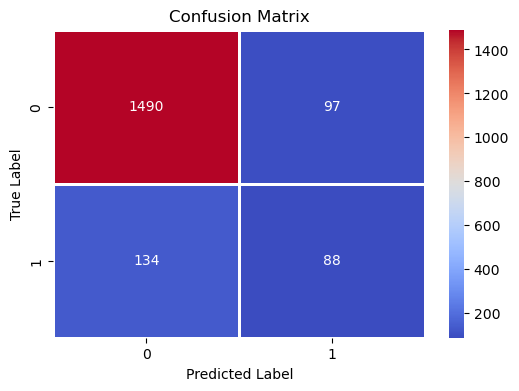


 ForRandomForestClassifier, Accuracy Score is 0.8850193477059148 

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1743
           1       0.18      0.61      0.28        66

    accuracy                           0.89      1809
   macro avg       0.58      0.75      0.61      1809
weighted avg       0.95      0.89      0.91      1809



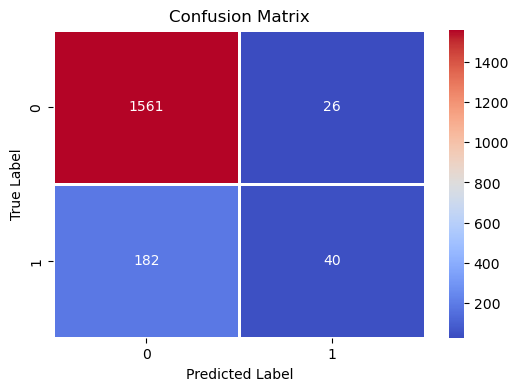


 ForKNeighborsClassifier, Accuracy Score is 0.8783858485351023 

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1735
           1       0.17      0.51      0.26        74

    accuracy                           0.88      1809
   macro avg       0.57      0.70      0.60      1809
weighted avg       0.94      0.88      0.91      1809



c:\Users\iphy2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


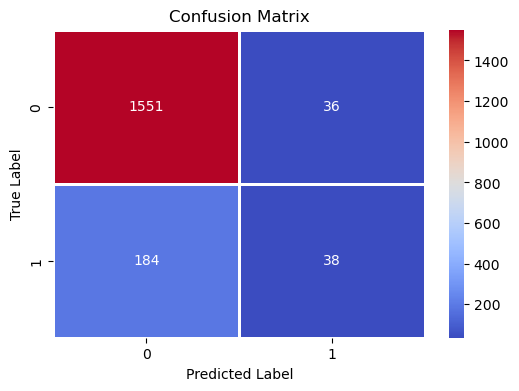


 ForGradientBoostingClassifier, Accuracy Score is 0.8899944720840243 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1706
           1       0.28      0.61      0.39       103

    accuracy                           0.89      1809
   macro avg       0.63      0.76      0.66      1809
weighted avg       0.94      0.89      0.91      1809



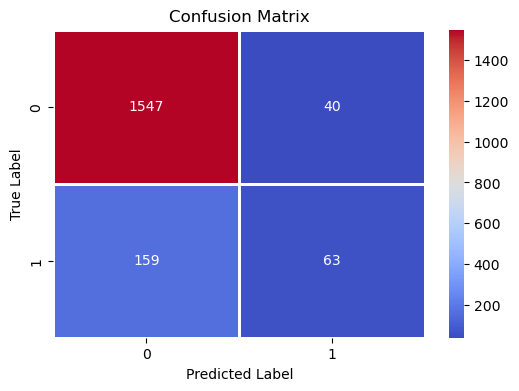

In [79]:
for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

# Observation on Metric Evaluation

- Its observed that Gradient Boosting Classifier has 88.9% accuracy score with a high recall of about 61% and 28% percision compared to other models that was 
trained and validated. The implication of that is there is 0.61% likelihood that a customer will subscribe to the bank_product while 0.28% 
wont subscribe based on the model performance in terms of recall, orecision and accuracy.

In [80]:
# Evaluate your models using K-fold cross validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_predict

#Prepare the cross-validation procedure

cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

# Evaluating my models

1.  Accuracy

In [81]:
# Create a function to train a model with cross validation and evaluate accuracy

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1) # Evaluate model

    print('Accuracy: %.3f' % (mean(scores)))

In [82]:
# Train and Predict, Looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Accuracy: 0.872
Accuracy: 0.898
Accuracy: 0.876
Accuracy: 0.900


2. Check for Recall

In [83]:
# Create a function to train a model with cross validation and evaluate recall

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1) # Evaluate model

    print('Recall: %.3f' % (mean(scores)))

In [84]:
# Train and Predict, Looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Recall: 0.440
Recall: 0.198
Recall: 0.149
Recall: 0.354


3. Precision

In [85]:
# Create a function to train a model with cross validation and evaluate recall

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1) # Evaluate model

    print('Precision: %.3f' % (mean(scores)))

In [86]:
# Train and Predict, Looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Precision: 0.434
Precision: 0.203
Precision: 0.149
Precision: 0.354
